In [1]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [14]:
#make_blobs() 각 데이터 한 점이 몇 번째 클러스터에 속해있는지 알려주는 인덱스 레이블을 만들어낸다.
# 우리가 학습시킬 신경망은 두 가지 레이블만 예측하는 모델
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers = [[1,1], [-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [15]:
# label_map()이라는 함수를 구현해 
# 0번이나 1번을 레이블로 가진 데이터는 0번 레이블을 갖도록
# 2번이나 3번을 레이블로 가진 데이터는 1번 레이블을 갖도록

def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

print(y_train)
y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)
print()
print(y_train)

[3 1 2 3 2 1 0 0 0 3 0 0 3 3 0 3 3 3 1 0 0 1 2 3 1 1 1 2 2 2 0 3 2 3 3 0 1
 1 3 2 1 2 2 0 2 2 1 1 2 1 1 0 3 2 0 0 1 0 2 0 3 2 0 2 1 2 2 1 3 0 0 3 1 1
 0 3 3 2 1 3]

[1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0
 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0
 0 1 1 1 0 1]


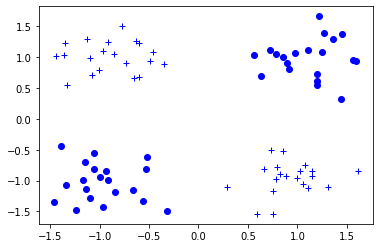

In [21]:
# 데이터가 제대로 만들어지고 레이블링 되었는지 확인 -> 맷플롯립 시각화
# 레이블이 0인 데이터는 점(.), 1인 데이터는 십자(+)

def vis_data(x,y = None, c='r'):
    if y is None:
        y = [None] * len(x)
    # print(y)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none',
            markeredgecolor=c)
            
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure
vis_data(x_train, y_train, c='b')
plt.show()


In [25]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([80, 2])
torch.Size([20, 2])
torch.Size([80])
torch.Size([20])


In [31]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()


    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [32]:
model = NeuralNet(2,5)
learning_rate = 0.03
# 파이토치가 제공하는 여러 오차 함수 criterion
# 이진교차엔트로피 BCELoss()
criterion = torch.nn.BCELoss()
# 전체 학습 데이터를 총 몇 번 모델에 입력할지 결정하는 변수
epochs = 2000
# 확률적 경사하강법
# optimizer는 step() 함수를 부를 때마다 가중치 학습률만큼 갱신
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [33]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print("Before Training, test loss is {}".format(test_loss_before.item()))

Before Training, test loss is 0.6929154992103577


In [34]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch%100 == 0:
        print(f'Train loss at {epoch} is {train_loss.item()}')
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6935779452323914
Train loss at 100 is 0.638884425163269
Train loss at 200 is 0.5556797385215759
Train loss at 300 is 0.45020800828933716
Train loss at 400 is 0.33917754888534546
Train loss at 500 is 0.23787550628185272
Train loss at 600 is 0.16487973928451538
Train loss at 700 is 0.11938955634832382
Train loss at 800 is 0.09098783135414124
Train loss at 900 is 0.07235624641180038
Train loss at 1000 is 0.05948755890130997
Train loss at 1100 is 0.05019604414701462
Train loss at 1200 is 0.04324468970298767
Train loss at 1300 is 0.03786718100309372
Train loss at 1400 is 0.033601064234972
Train loss at 1500 is 0.030155036598443985
Train loss at 1600 is 0.027315258979797363
Train loss at 1700 is 0.0249374620616436
Train loss at 1800 is 0.02292066439986229
Train loss at 1900 is 0.021191569045186043


In [35]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print(f'After Training, test loss is {test_loss.item()}')

After Training, test loss is 0.024274561554193497


In [36]:
torch.save(model.state_dict(), './model.pt')
print(f'state_dict format of the model: {model.state_dict()}')

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.3895,  1.5698],
        [ 0.5385,  0.4347],
        [-1.5466, -1.3803],
        [ 1.5477,  1.4156],
        [ 1.4747, -1.3558]])), ('linear_1.bias', tensor([ 0.0404, -0.1263,  0.0246, -0.2210,  0.1246])), ('linear_2.weight', tensor([[ 2.0576, -0.5942, -1.8743, -2.0313,  1.8646]])), ('linear_2.bias', tensor([-0.1986]))])


In [38]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print(f'벡터 [-1, 1]이 레이블 1을 가질 확률은 {(new_model(torch.FloatTensor([-1, 1]))).item()}')

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9963733553886414
